In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
#https://www.kaggle.com/datasets/rhuebner/human-resources-data-set

In [2]:
df = pd.read_csv("HRDataset_v14.csv")

In [3]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [6]:
df.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
309,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [12]:
## Maaşı etkilemeyecek, sadece kimlik belirten kolonlar
cols_to_drop = [
    'Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 
    'EmpStatusID', 'DeptID', 'PerfScoreID', 'PositionID', 'Zip', 'DOB', 
    'DateofHire', 'DateofTermination', 'TermReason', 'ManagerName', 
    'ManagerID', 'LastPerformanceReview_Date'
]

In [13]:
df_cleaned = df.drop(cols_to_drop, axis=1)

In [17]:
df_cleaned.head()

,FromDiversityJobFairID,Salary,Termd,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,0,62506,0,Production Technician I,MA,M,Single,US Citizen,No,White,Active,Production,LinkedIn,Exceeds,4.60,5,0,0,1
1,0,104437,1,Sr. DBA,MA,M,Married,US Citizen,No,White,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3,6,0,17
2,0,64955,1,Production Technician II,MA,F,Married,US Citizen,No,White,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3,0,0,3
3,0,64991,0,Production Technician I,MA,F,Married,US Citizen,No,White,Active,Production,Indeed,Fully Meets,4.84,5,0,0,15
4,0,50825,1,Production Technician I,MA,F,Divorced,US Citizen,No,White,Voluntarily Terminated,Production,Google Search,Fully Meets,5.00,4,0,0,2


In [15]:
#pd.get_dummies tüm metinleri 0-1 yapar, dtype=int  True/False yerine 0 ve 1 için eklendi
df_final = pd.get_dummies(df_cleaned, drop_first=True, dtype=int)

In [16]:
df_final.head()

,FromDiversityJobFairID,Salary,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Position_Administrative Assistant,Position_Area Sales Manager,...,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website,PerformanceScore_Fully Meets,PerformanceScore_Needs Improvement,PerformanceScore_PIP
0,0,62506,0,4.60,5,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,104437,1,4.96,3,6,0,17,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,64955,1,3.02,3,0,0,3,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,64991,0,4.84,5,0,0,15,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,50825,1,5.00,4,0,0,2,0,0,...,0,1,0,0,0,0,0,1,0,0


In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 99 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   FromDiversityJobFairID                     311 non-null    int64  
 1   Salary                                     311 non-null    int64  
 2   Termd                                      311 non-null    int64  
 3   EngagementSurvey                           311 non-null    float64
 4   EmpSatisfaction                            311 non-null    int64  
 5   SpecialProjectsCount                       311 non-null    int64  
 6   DaysLateLast30                             311 non-null    int64  
 7   Absences                                   311 non-null    int64  
 8   Position_Administrative Assistant          311 non-null    int64  
 9   Position_Area Sales Manager                311 non-null    int64  
 10  Position_BI Developer     

In [19]:
X = df_final.drop("Salary", axis=1)
y = df_final["Salary"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
def compare_hr_models(X_train, y_train, X_test, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge()
    }
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        print(f"--- {name} ---")
        print(f"R2 Skoru: {r2:.4f}")
        print(f"MAE (Maaş Sapması): {mae:.2f} $\n")

In [26]:
compare_hr_models(X_train_scaled, y_train, X_test_scaled, y_test)

--- Linear Regression ---
R2 Skoru: 0.4213
MAE (Maaş Sapması): 9984.68 $

--- Lasso ---
R2 Skoru: 0.2914
MAE (Maaş Sapması): 10657.50 $

--- Ridge ---
R2 Skoru: 0.4324
MAE (Maaş Sapması): 9852.25 $



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.116e+08, tolerance: 1.418e+07
  model = cd_fast.enet_coordinate_descent(


In [27]:
best_model = Ridge()
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

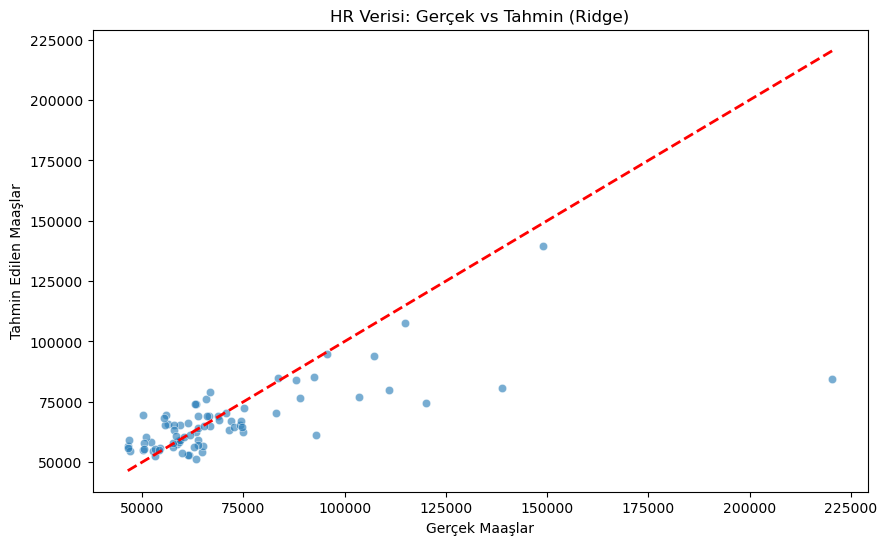

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Gerçek Maaşlar")
plt.ylabel("Tahmin Edilen Maaşlar")
plt.title("HR Verisi: Gerçek vs Tahmin (Ridge)")
plt.show()

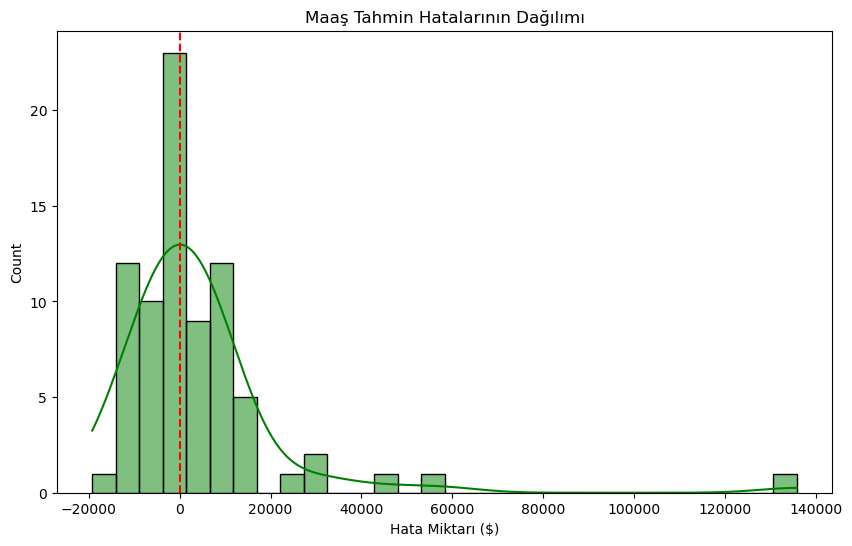

In [29]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.axvline(0, color='red', linestyle='--')
plt.title("Maaş Tahmin Hatalarının Dağılımı")
plt.xlabel("Hata Miktarı ($)")
plt.show()

/var/folders/kg/dbqqbcbx677f_02yzmhmctxc0000gn/T/ipykernel_66888/2245965160.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined['Katsayı'], y=combined.index, palette='RdYlGn')


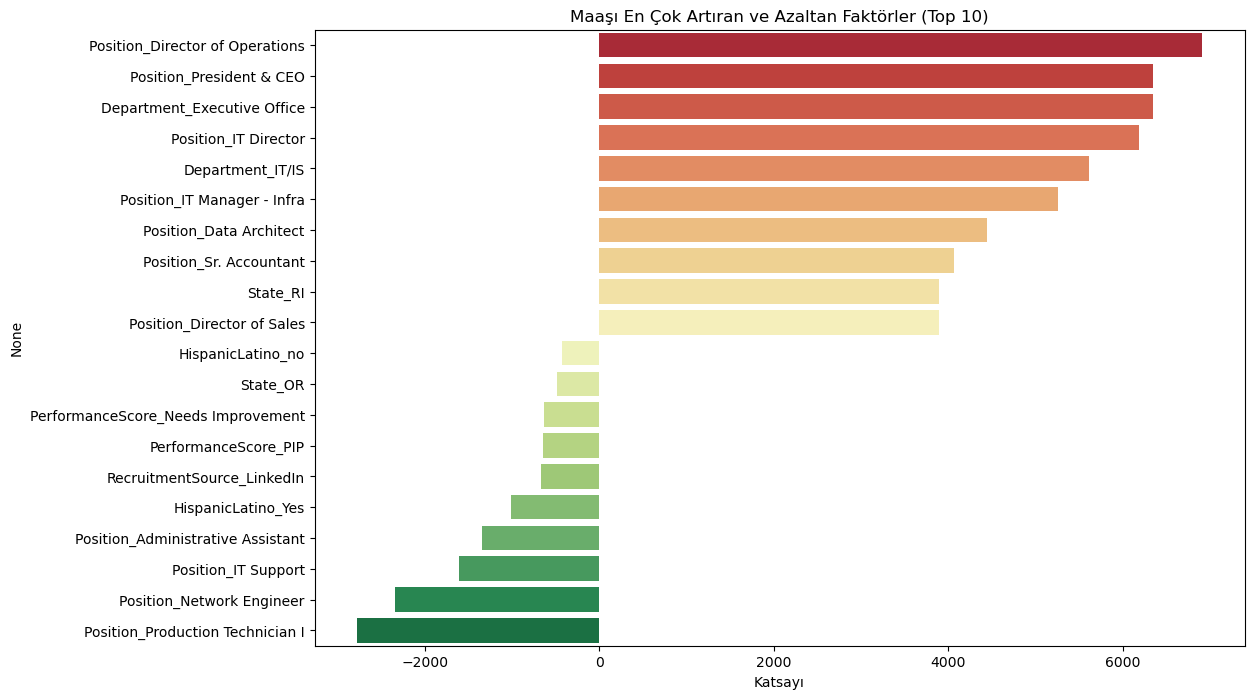

In [30]:
hr_coef = pd.DataFrame(best_model.coef_, X_train.columns, columns=['Katsayı'])
# En büyük ve en küçük etkileri (mutlak değerce en büyükleri) 
top_features = hr_coef.sort_values(by='Katsayı', ascending=False).head(10)
bottom_features = hr_coef.sort_values(by='Katsayı', ascending=False).tail(10)
combined = pd.concat([top_features, bottom_features])

plt.figure(figsize=(12,8))
sns.barplot(x=combined['Katsayı'], y=combined.index, palette='RdYlGn')
plt.title("Maaşı En Çok Artıran ve Azaltan Faktörler (Top 10)")
plt.show()

In [31]:
lassocv = LassoCV(cv=5, max_iter=10000)
lassocv.fit(X_train_scaled, y_train
           

LassoCV(cv=5, max_iter=10000)

In [32]:
print(f"LassoCV En İyi Alpha: {lassocv.alpha_}")
y_pred_cv = lassocv.predict(X_test_scaled)
print(f"LassoCV Final R2: {r2_score(y_test, y_pred_cv):.4f}")

LassoCV En İyi Alpha: 197.15448496775778
LassoCV Final R2: 0.5296


In [33]:
final_coef = pd.DataFrame(lassocv.coef_, X_train.columns, columns=['Katsayı'])

/var/folders/kg/dbqqbcbx677f_02yzmhmctxc0000gn/T/ipykernel_66888/4100479129.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom['Katsayı'], y=top_bottom.index, palette='coolwarm')


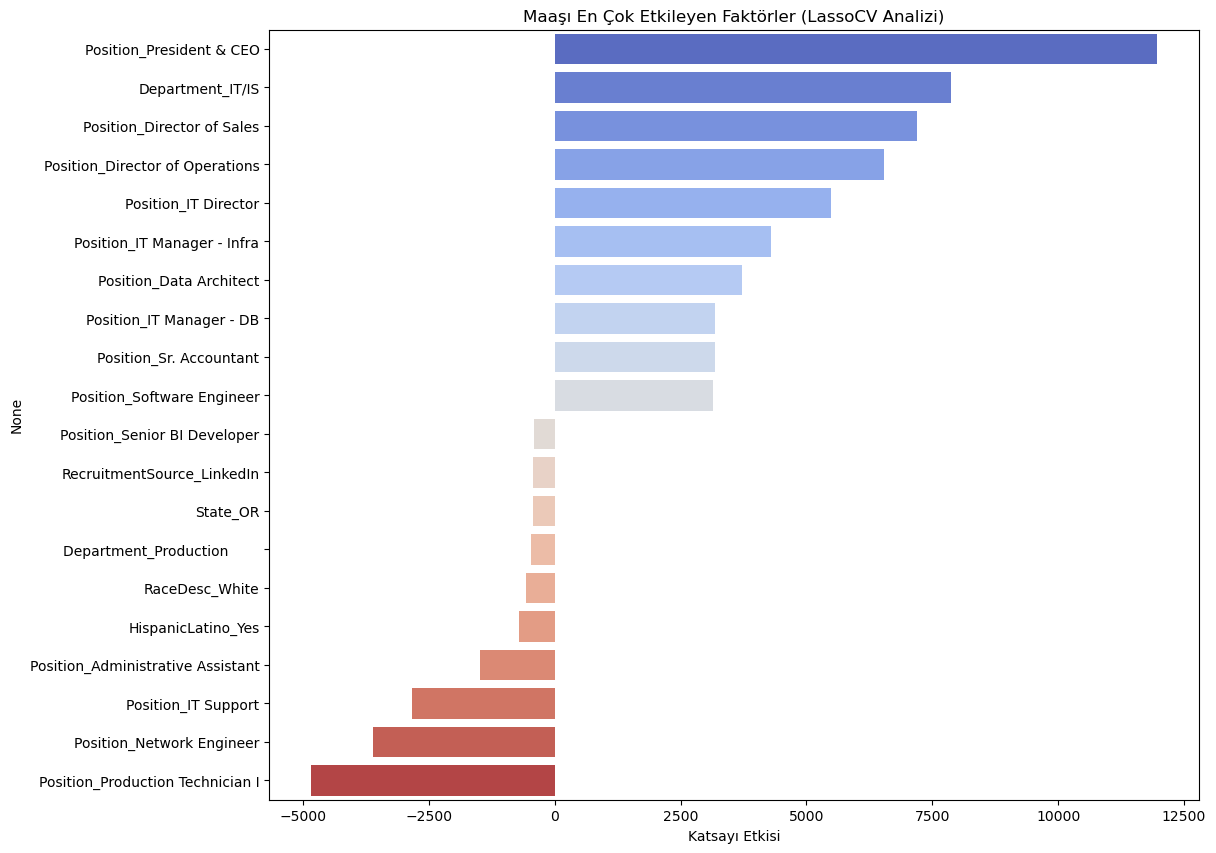

In [34]:
important_features = final_coef[final_coef['Katsayı'] != 0].sort_values(by='Katsayı', ascending=False)
top_bottom = pd.concat([important_features.head(10), important_features.tail(10)])

plt.figure(figsize=(12,10))
sns.barplot(x=top_bottom['Katsayı'], y=top_bottom.index, palette='coolwarm')
plt.title("Maaşı En Çok Etkileyen Faktörler (LassoCV Analizi)")
plt.xlabel("Katsayı Etkisi")
plt.show()

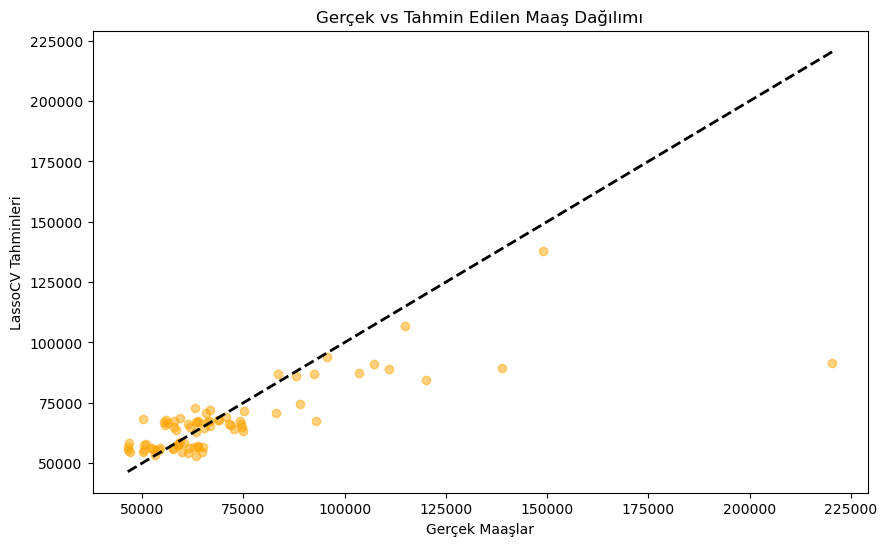

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_cv, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Gerçek Maaşlar")
plt.ylabel("LassoCV Tahminleri")
plt.title("Gerçek vs Tahmin Edilen Maaş Dağılımı")
plt.show()